<a href="https://colab.research.google.com/github/geetika-create/crop-production/blob/main/Crop_Production_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imports**

In [52]:
# Functions for statistical analysis
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import io
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor

# Functions for machine learning analysis
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
from sklearn.tree import plot_tree
cmap = plt.colormaps.get_cmap("Blues")

# **Data Loading**

In [18]:
from google.colab import files
uploaded = files.upload()

Saving Crop Production Dataset - Imputation Dataset.csv to Crop Production Dataset - Imputation Dataset.csv


In [23]:
df = pd.read_csv(io.BytesIO(uploaded['Crop Production Dataset - Imputation Dataset.csv']))
print(df)

    Year  Precipitation  Deforestation  Carbon Dioxide  Methane  Temperature  \
0   1961            639            NaN          194.00    64.33    -4.946920   
1   1962            654            NaN          206.99    65.99    -4.826949   
2   1963            646            NaN          210.91    66.87    -4.580211   
3   1964            659            NaN          237.58    70.50    -5.316351   
4   1965            643            NaN          251.92    72.86    -5.457571   
..   ...            ...            ...             ...      ...          ...   
58  2019            686           2.17          579.01   125.16    -3.619446   
59  2020            731           1.19          524.21   110.82    -3.555461   
60  2021            688           2.52          537.48   114.91    -2.753712   
61  2022            694           2.30          547.66   117.05    -3.573582   
62  2023            627           8.57          545.48   118.72    -1.805844   

    Pesticides  Nitrogen  Phosphorus  I

# **KNN Imputation**

In [24]:
# Features used to derive imputation
precipitation_list = df['Precipitation'].tolist()
carbonDioxide_list = df['Carbon Dioxide'].tolist()
methane_list = df['Methane'].tolist()
temperature_list = df['Temperature'].tolist()
nitrogen_list = df['Nitrogen'].tolist()
phosphorus_list = df['Phosphorus'].tolist()
production_list = df['Production'].tolist()

# Features for imputation
irrigation_list = df['Irrigation'].tolist()
deforestration_list = df['Deforestation'].tolist()
pesticides_list = df['Pesticides'].tolist()

In [25]:
data1 = list(zip(precipitation_list[40:], carbonDioxide_list[40:], methane_list[40:], temperature_list[40:], nitrogen_list[40:], phosphorus_list[40:], production_list[40:]))
# print(data1)

data2 = list(zip(precipitation_list[29:], carbonDioxide_list[29:], methane_list[29:], temperature_list[29:], nitrogen_list[29:], phosphorus_list[29:], production_list[29:]))
# print(data2)

data3 = list(zip(precipitation_list[30:], carbonDioxide_list[30:], methane_list[30:], temperature_list[30:], nitrogen_list[30:], phosphorus_list[30:], production_list[30:]))
# print(data3)

knn1 = KNeighborsRegressor(n_neighbors=1)
knn1.fit(data1, deforestration_list[40:])

knn2 = KNeighborsRegressor(n_neighbors=2)
knn2.fit(data2, pesticides_list[29:])

knn3 = KNeighborsRegressor(n_neighbors=2)
knn3.fit(data3, irrigation_list[30:])

KNeighborsRegressor(n_neighbors=2)

In [26]:
new_data1 = list(zip(precipitation_list[:40], carbonDioxide_list[:40], methane_list[:40], temperature_list[:40], nitrogen_list[:40], phosphorus_list[:40], production_list[:40]))
new_data2 = list(zip(precipitation_list[:29], carbonDioxide_list[:29], methane_list[:29], temperature_list[:29], nitrogen_list[:29], phosphorus_list[:29], production_list[:29]))
new_data3 = list(zip(precipitation_list[:30], carbonDioxide_list[:30], methane_list[:30], temperature_list[:30], nitrogen_list[:30], phosphorus_list[:30], production_list[:30]))

deforestation_list_imputed = []
pesticides_list_imputed = []
irrigation_list_imputed = []

for i in range(len(precipitation_list[:40])):
  prediction = knn1.predict([new_data1[i]])
  deforestation_list_imputed.append(float(prediction[0]))

print(deforestation_list_imputed)

for i in range(len(precipitation_list[:29])):
  prediction = knn2.predict([new_data2[i]])
  pesticides_list_imputed.append(float(prediction[0]))

print(pesticides_list_imputed)

for i in range(len(precipitation_list[:30])):
  prediction = knn3.predict([new_data3[i]])
  irrigation_list_imputed.append(float(prediction[0]))

print(irrigation_list_imputed)

[1.19, 1.19, 1.19, 1.19, 1.19, 1.19, 1.54, 1.19, 1.54, 1.54, 1.54, 1.54, 1.19, 2.52, 1.54, 2.52, 2.52, 1.54, 1.54, 2.52, 1.54, 1.54, 2.52, 2.52, 1.54, 2.52, 1.54, 2.52, 1.54, 2.52, 2.52, 1.54, 1.54, 1.54, 1.54, 2.52, 2.52, 1.54, 2.08, 1.35]
[0.029523, 0.029523, 0.029523, 0.029523, 0.029523, 0.029523, 0.029523, 0.029523, 0.0294325, 0.0294325, 0.029523, 0.0294325, 0.029523, 0.029523, 0.029523, 0.029523, 0.029523, 0.0294325, 0.0293875, 0.029523, 0.0294325, 0.0294325, 0.029523, 0.029523, 0.029523, 0.029523, 0.0294325, 0.029523, 0.029342]
[4.0023, 4.0023, 4.0023, 4.0023, 4.0023, 4.0023, 4.0023, 4.0136, 4.0023, 4.0023, 4.0023, 4.0023, 4.0136, 4.0136, 4.0023, 4.0136, 4.0136, 4.0023, 4.0136, 4.0136, 4.0023, 4.0023, 4.0136, 4.0136, 4.0136, 4.0136, 4.0023, 4.0136, 4.024900000000001, 4.0136]


# **Statistical Analysis**

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Crop Production Dataset - Dataset Final.csv to Crop Production Dataset - Dataset Final.csv


In [5]:
df1 = pd.read_csv(io.BytesIO(uploaded['Crop Production Dataset - Dataset Final.csv']))
print(df1)

    Year  Precipitation  Deforestation  Carbon Dioxide  Methane  Temperature  \
0   1961            639           1.19          194.00    64.33    -4.946920   
1   1962            654           1.19          206.99    65.99    -4.826949   
2   1963            646           1.19          210.91    66.87    -4.580211   
3   1964            659           1.19          237.58    70.50    -5.316351   
4   1965            643           1.19          251.92    72.86    -5.457571   
..   ...            ...            ...             ...      ...          ...   
58  2019            686           2.17          579.01   125.16    -3.619446   
59  2020            731           1.19          524.21   110.82    -3.555461   
60  2021            688           2.52          537.48   114.91    -2.753712   
61  2022            694           2.30          547.66   117.05    -3.573582   
62  2023            627           8.57          545.48   118.72    -1.805844   

    Pesticides  Nitrogen  Phosphorus  I

In [6]:
df1_table = df1.describe().drop(columns=['Year'])
df1_table

,Precipitation,Deforestation,Carbon Dioxide,Methane,Temperature,Pesticides,Nitrogen,Phosphorus,Irrigation,Production
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,661.222222,2.035397,458.055238,102.934603,-4.162602,0.043998,1.392373,0.646675,4.257525,48.736077
std,23.663940,0.995584,110.246190,19.514967,0.974909,0.022662,0.851361,0.236413,4.130561,13.570692
min,615.000000,1.190000,194.000000,64.330000,-6.767322,0.029206,0.098348,0.196763,2.180387,15.493218
25%,646.000000,1.540000,401.845000,88.625000,-4.826802,0.029523,0.677200,0.532255,3.819500,36.704893
50%,660.000000,1.940000,463.390000,103.660000,-4.271507,0.029523,1.338500,0.634500,4.002300,51.779228
75%,675.500000,2.520000,560.375000,121.815000,-3.564522,0.049426,1.911897,0.715500,4.013600,57.087922
max,731.000000,8.570000,589.960000,129.920000,-1.689738,0.098304,3.116000,1.194000,36.250000,75.270895


IQR Outlier Identification

In [37]:
def identify_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return len(outliers)

features = ['Production', 'Temperature', 'Carbon Dioxide', 'Methane', 'Deforestation', 'Precipitation', 'Pesticides', 'Phosphorus', 'Irrigation']

for i in features:
    print(f'{i}: {identify_outliers(df1[i])}')

Production: 0
Temperature: 1
Carbon Dioxide: 0
Methane: 0
Deforestation: 1
Precipitation: 1
Pesticides: 8
Phosphorus: 11
Irrigation: 17


Crop Production Distribution

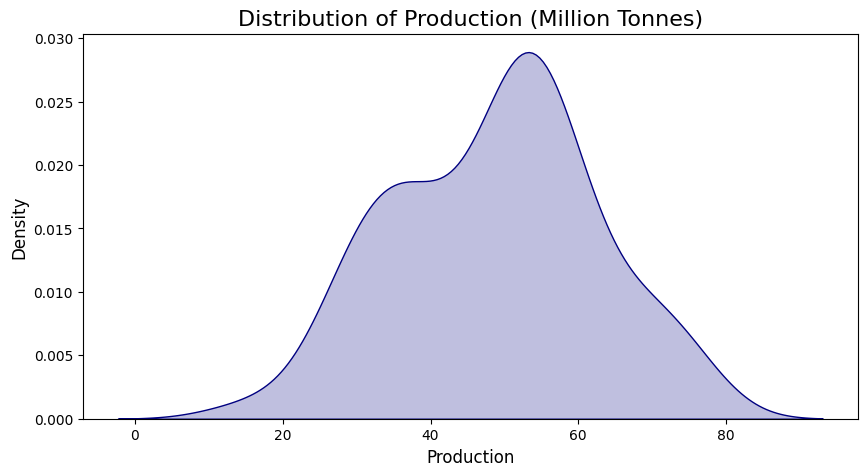

In [38]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df1['Production'], color='navy', fill=True)

plt.title('Distribution of Production (Million Tonnes)', fontsize=16)
plt.xlabel('Production', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

Correlation Analysis


Correlation: 0.899


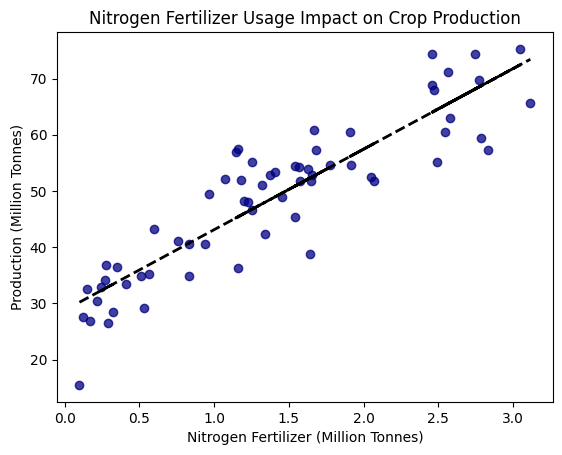


Correlation: 0.555


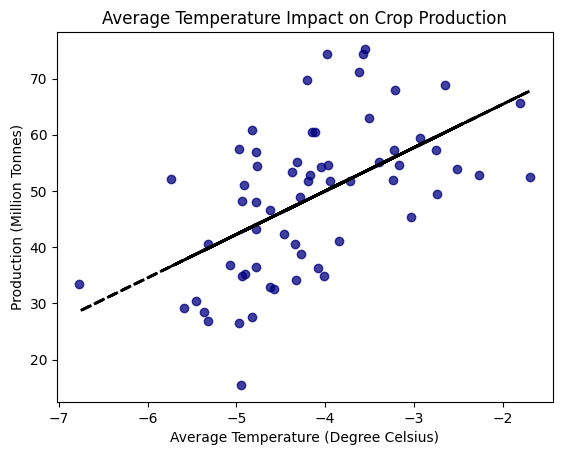


Correlation: 0.813


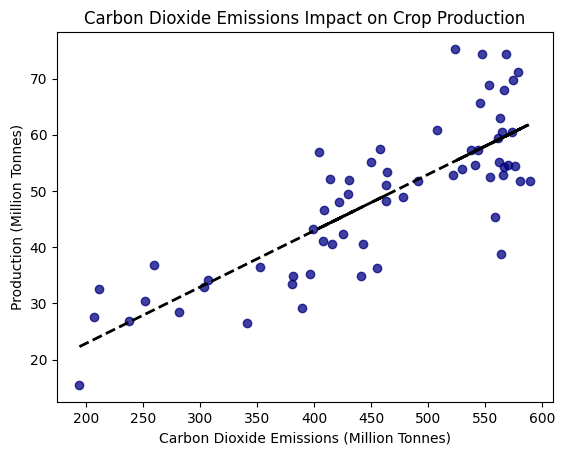


Correlation: 0.794


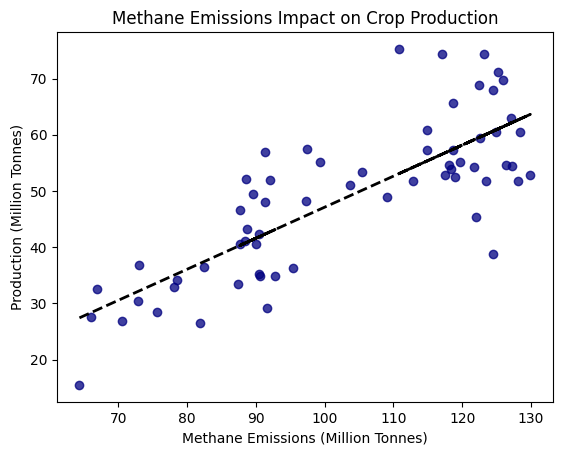


Correlation: 0.389


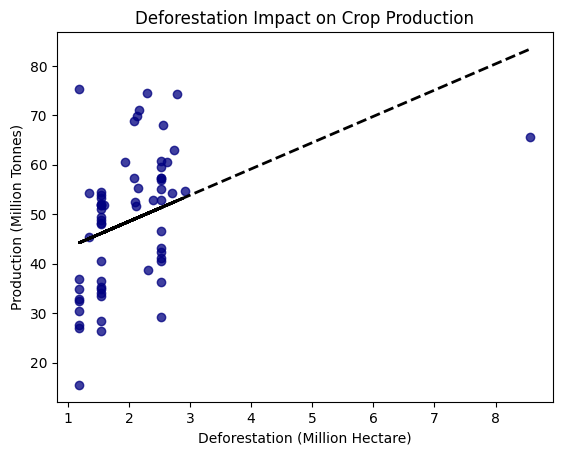


Correlation: 0.524


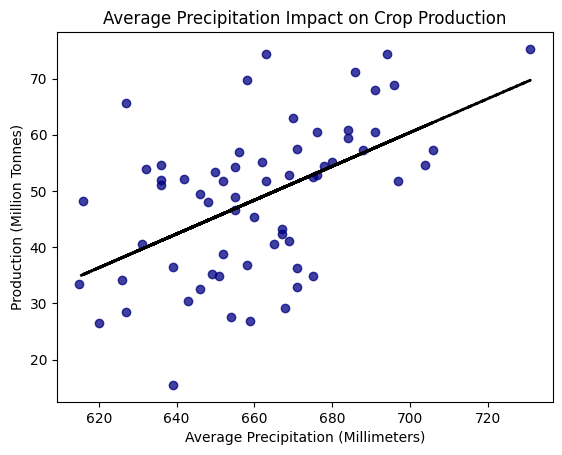


Correlation: 0.745


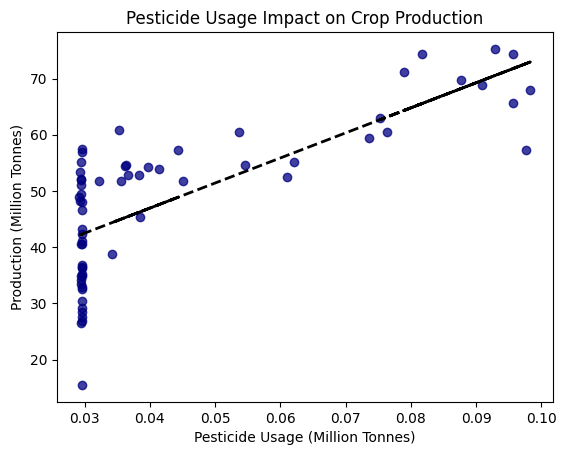


Correlation: 0.870


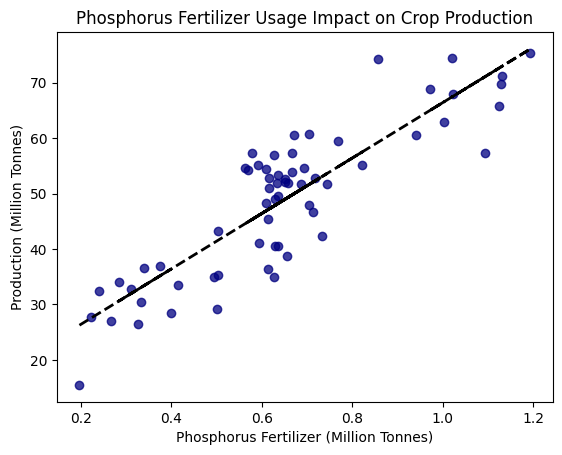


Correlation: 0.120


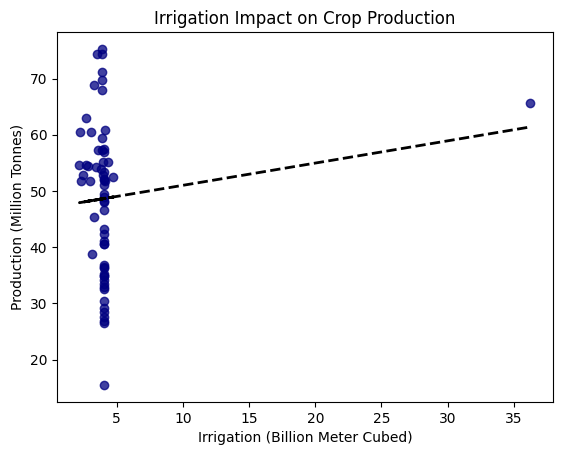

In [11]:
# Nitrogen fertilizer usage correlation graph

correlation = df1['Nitrogen'].corr(df1['Production'])
print(f"Correlation: {correlation:.3f}")

plt.scatter(df1['Nitrogen'], df1['Production'], alpha=0.75, color='navy')

z = np.polyfit(df1['Nitrogen'], df1['Production'], 1)
p = np.poly1d(z)
plt.plot(df1['Nitrogen'], p(df1['Nitrogen']), "--", linewidth=2, color='black')

plt.xlabel('Nitrogen Fertilizer (Million Tonnes)')
plt.ylabel('Production (Million Tonnes)')
plt.title('Nitrogen Fertilizer Usage Impact on Crop Production')
plt.show()

print()


# Average temperature correlation graph

correlation = df1['Temperature'].corr(df1['Production'])
print(f"Correlation: {correlation:.3f}")

plt.scatter(df1['Temperature'], df1['Production'], alpha=0.75, color='navy')

z = np.polyfit(df1['Temperature'], df1['Production'], 1)
p = np.poly1d(z)
plt.plot(df1['Temperature'], p(df1['Temperature']), "--", linewidth=2, color='black')

plt.xlabel('Average Temperature (Degree Celsius)')
plt.ylabel('Production (Million Tonnes)')
plt.title('Average Temperature Impact on Crop Production')
plt.show()

print()


# Carbon dioxide emissions correlation graph

correlation = df1['Carbon Dioxide'].corr(df1['Production'])
print(f"Correlation: {correlation:.3f}")

plt.scatter(df1['Carbon Dioxide'], df1['Production'], alpha=0.75, color='navy')
z = np.polyfit(df1['Carbon Dioxide'], df1['Production'], 1)
p = np.poly1d(z)
plt.plot(df1['Carbon Dioxide'], p(df1['Carbon Dioxide']), "--", linewidth=2, color='black')

plt.xlabel('Carbon Dioxide Emissions (Million Tonnes)')
plt.ylabel('Production (Million Tonnes)')
plt.title('Carbon Dioxide Emissions Impact on Crop Production')
plt.show()

print()


# Methane emissions correlation graph

correlation = df1['Methane'].corr(df1['Production'])
print(f"Correlation: {correlation:.3f}")

plt.scatter(df1['Methane'], df1['Production'], alpha=0.75, color='navy')
z = np.polyfit(df1['Methane'], df1['Production'], 1)
p = np.poly1d(z)
plt.plot(df1['Methane'], p(df1['Methane']), "--", linewidth=2, color='black')

plt.xlabel('Methane Emissions (Million Tonnes)')
plt.ylabel('Production (Million Tonnes)')
plt.title('Methane Emissions Impact on Crop Production')
plt.show()

print()


# Deforestation (tree cover loss) correlation graph

correlation = df1['Deforestation'].corr(df1['Production'])
print(f"Correlation: {correlation:.3f}")

plt.scatter(df1['Deforestation'], df1['Production'], alpha=0.75, color='navy')
z = np.polyfit(df1['Deforestation'], df1['Production'], 1)
p = np.poly1d(z)
plt.plot(df1['Deforestation'], p(df1['Deforestation']), "--", linewidth=2, color='black')

plt.xlabel('Deforestation (Million Hectare)')
plt.ylabel('Production (Million Tonnes)')
plt.title('Deforestation Impact on Crop Production')
plt.show()

print()


# Average precipitation correlation graph

correlation = df1['Precipitation'].corr(df1['Production'])
print(f"Correlation: {correlation:.3f}")

plt.scatter(df1['Precipitation'], df1['Production'], alpha=0.75, color='navy')
z = np.polyfit(df1['Precipitation'], df1['Production'], 1)
p = np.poly1d(z)
plt.plot(df1['Precipitation'], p(df1['Precipitation']), "--", linewidth=2, color='black')

plt.xlabel('Average Precipitation (Millimeters)')
plt.ylabel('Production (Million Tonnes)')
plt.title('Average Precipitation Impact on Crop Production')
plt.show()

print()


# Pesticide usage correlation graph

correlation = df1['Pesticides'].corr(df1['Production'])
print(f"Correlation: {correlation:.3f}")

plt.scatter(df1['Pesticides'], df1['Production'], alpha=0.75, color='navy')
z = np.polyfit(df1['Pesticides'], df1['Production'], 1)
p = np.poly1d(z)
plt.plot(df1['Pesticides'], p(df1['Pesticides']), "--", linewidth=2, color='black')

plt.xlabel('Pesticide Usage (Million Tonnes)')
plt.ylabel('Production (Million Tonnes)')
plt.title('Pesticide Usage Impact on Crop Production')
plt.show()

print()


# Phosphorus fertilizer usage correlation graph

correlation = df1['Phosphorus'].corr(df1['Production'])
print(f"Correlation: {correlation:.3f}")

plt.scatter(df1['Phosphorus'], df1['Production'], alpha=0.75, color='navy')

z = np.polyfit(df1['Phosphorus'], df1['Production'], 1)
p = np.poly1d(z)
plt.plot(df1['Phosphorus'], p(df1['Phosphorus']), "--", linewidth=2, color='black')

plt.xlabel('Phosphorus Fertilizer (Million Tonnes)')
plt.ylabel('Production (Million Tonnes)')
plt.title('Phosphorus Fertilizer Usage Impact on Crop Production')
plt.show()

print()


# Irrigation availability correlation graph

correlation = df1['Irrigation'].corr(df1['Production'])
print(f"Correlation: {correlation:.3f}")

plt.scatter(df1['Irrigation'], df1['Production'], alpha=0.75, color='navy')

z = np.polyfit(df1['Irrigation'], df1['Production'], 1)
p = np.poly1d(z)
plt.plot(df1['Irrigation'], p(df1['Irrigation']), "--", linewidth=2, color='black')

plt.xlabel('Irrigation (Billion Meter Cubed)')
plt.ylabel('Production (Million Tonnes)')
plt.title('Irrigation Impact on Crop Production')
plt.show()


Correlation Heatmap

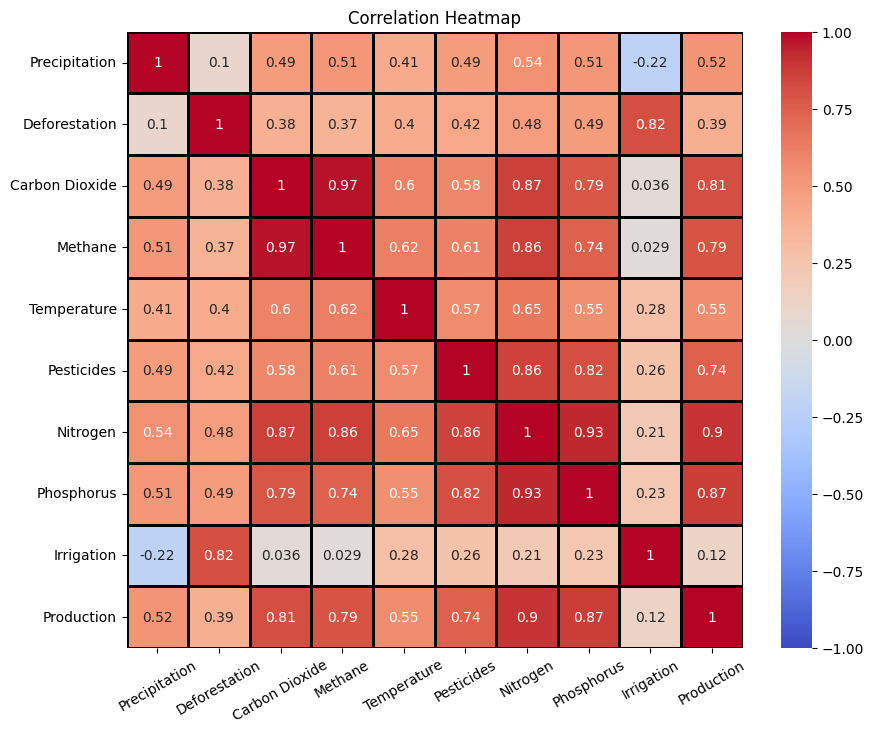

In [41]:
df1_corr = df1.corr(numeric_only=True)
df1_corr_no_year = df1_corr.drop(columns=['Year'], index=['Year'])

plt.figure(figsize=(10,8))
sns.heatmap(df1_corr_no_year, annot=True, vmin=-1, vmax=1, center= 0, cmap='coolwarm', linewidths=2, linecolor='black', square=True)
plt.title('Correlation Heatmap')
plt.xticks(rotation=30);

# **Random Forest Model**

Train/Test Split

In [42]:
X = df1.drop(['Year', 'Production'], axis=1)
y = df1['Production']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

Train RF Model

In [43]:
rf_model = RandomForestRegressor(n_estimators=100, bootstrap=True, oob_score=True, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(oob_score=True, random_state=42)

Evaluate RF Model

In [51]:
y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

Root Mean Squared Error: 6.34
R-squared: 0.83


# **Importances**

Feature Importance

          Feature  Importance
6        Nitrogen    0.342316
5      Pesticides    0.260508
3         Methane    0.172910
7      Phosphorus    0.077064
2  Carbon Dioxide    0.057878
4     Temperature    0.029942
0   Precipitation    0.029206
1   Deforestation    0.023784
8      Irrigation    0.006392



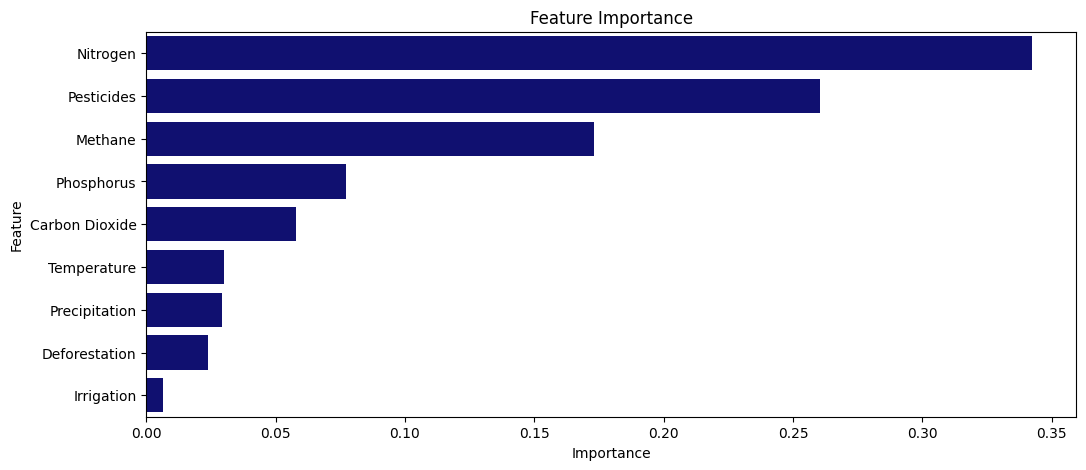

In [59]:
importances = rf_model.feature_importances_

feature_importance_df1 = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

print(feature_importance_df1)
print()

plt.figure(figsize=(12, 5))
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
sns.barplot(x='Importance', y='Feature', data=feature_importance_df1, color='navy')
plt.show()

Permutation Importance

Nitrogen          0.252744
Pesticides        0.214130
Methane           0.060195
Carbon Dioxide    0.045529
Phosphorus        0.022649
Deforestation     0.020526
Temperature       0.016984
Precipitation     0.002200
Irrigation       -0.000103



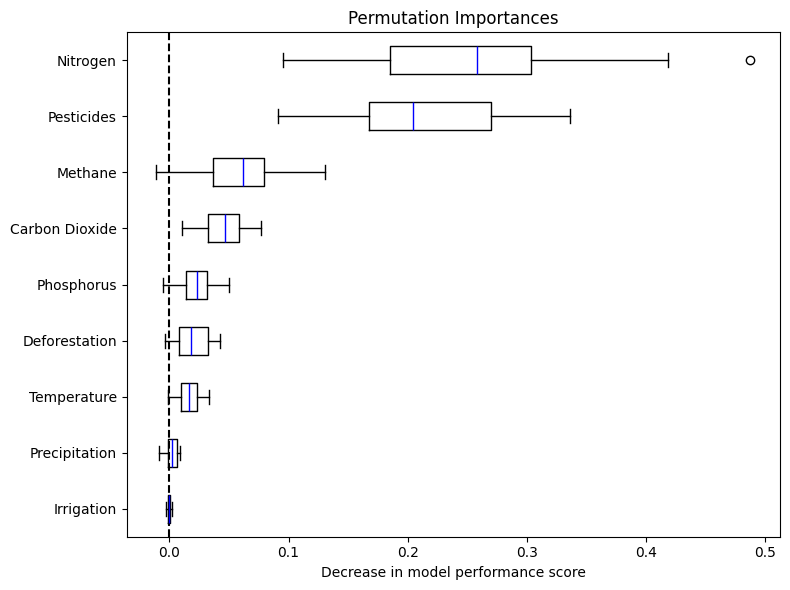

In [61]:
perm = permutation_importance(rf_model, X_test, y_test, n_repeats=30, random_state=42, n_jobs=-1)
perm_importances = pd.Series(perm.importances_mean, index=X.columns).sort_values(ascending=False)

print(perm_importances.to_string())
print()

sorted_idx = perm.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(8, 6))

ax.boxplot(perm.importances[sorted_idx].T, vert=False, tick_labels=np.array(X_test.columns)[sorted_idx], medianprops=dict(color="blue", linewidth=1))
ax.axvline(x=0, color="black", linestyle="--")

ax.set_title("Permutation Importances")
ax.set_xlabel("Decrease in model performance score")

plt.tight_layout()
plt.show()

# **RF Tree Architecture**

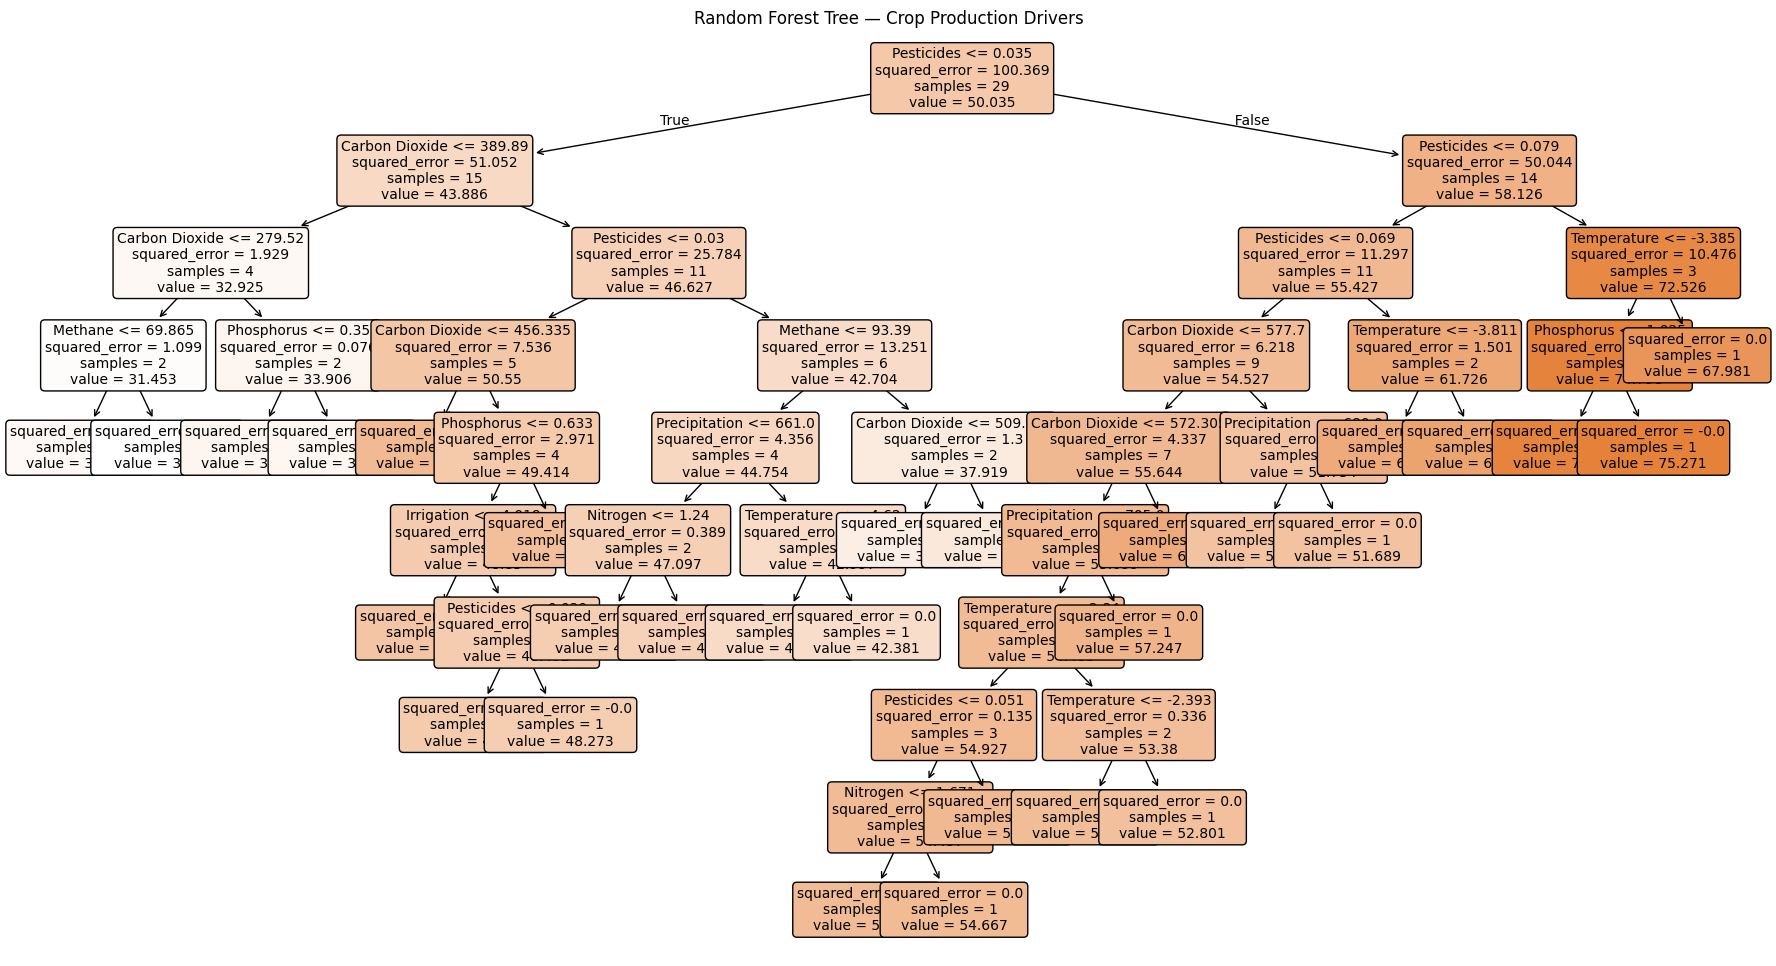

In [62]:
tree = rf_model.estimators_[0]

plt.figure(figsize=(22, 12))
plot_tree(tree, feature_names=X.columns, filled=True, rounded=True, fontsize=10)

plt.title("Random Forest Tree — Crop Production Drivers")
plt.show()